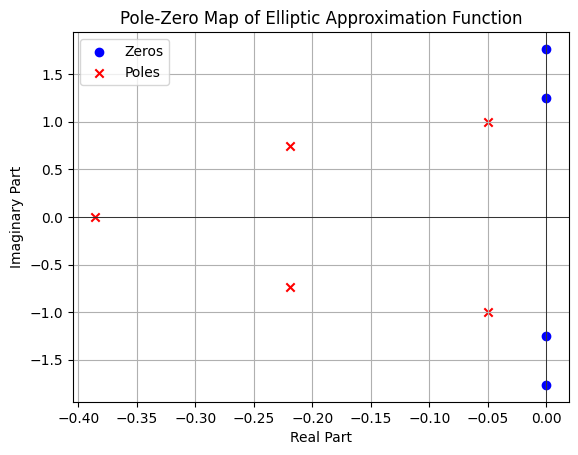

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.signal import ellipord, ellipap

def elliptic_approximation_pzmap(passband_edge, stopband_edge, passband_ripple, stopband_attenuation):
    # Step 1: Calculate the minimum filter order and natural frequency
    N, Wn = ellipord(passband_edge, stopband_edge, passband_ripple, stopband_attenuation, analog=True)
    
    # Step 2: Get the poles, zeros, and gain of the analog lowpass elliptic filter
    z, p, k = ellipap(N, passband_ripple, stopband_attenuation)
    
    return z, p, k

# Example specifications
passband_edge = 1.0  # Passband edge frequency (normalized)
stopband_edge = 1.5  # Stopband edge frequency (normalized)
passband_ripple = 1  # Passband ripple in dB
stopband_attenuation = 40  # Stopband attenuation in dB

# Calculate the poles and zeros of the elliptic approximation function
zeros, poles, gain = elliptic_approximation_pzmap(passband_edge, stopband_edge, passband_ripple, stopband_attenuation)

# Plot the pole-zero map
plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Pole-Zero Map of Elliptic Approximation Function')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.legend()
plt.show()